<a href="https://colab.research.google.com/github/ericfruchi/portifolio/blob/master/Analisando_os_Dados_do_Airbnb_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Amsterdam*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Amsterdam, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-05-08/visualisations/listings.csv")

## Análise dos Dados


Estruturação dos dados:

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada 
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.05,1,157
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.45,1,36
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.74,2,112
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.14,1,287


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 19278
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [0]:
df.isnull() .sum()

id                                    0
name                                 33
host_id                               0
host_name                             3
neighbourhood_group               19278
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2298
reviews_per_month                  2298
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.119203
last_review                       0.119203
name                              0.001712
host_name                         0.000156
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

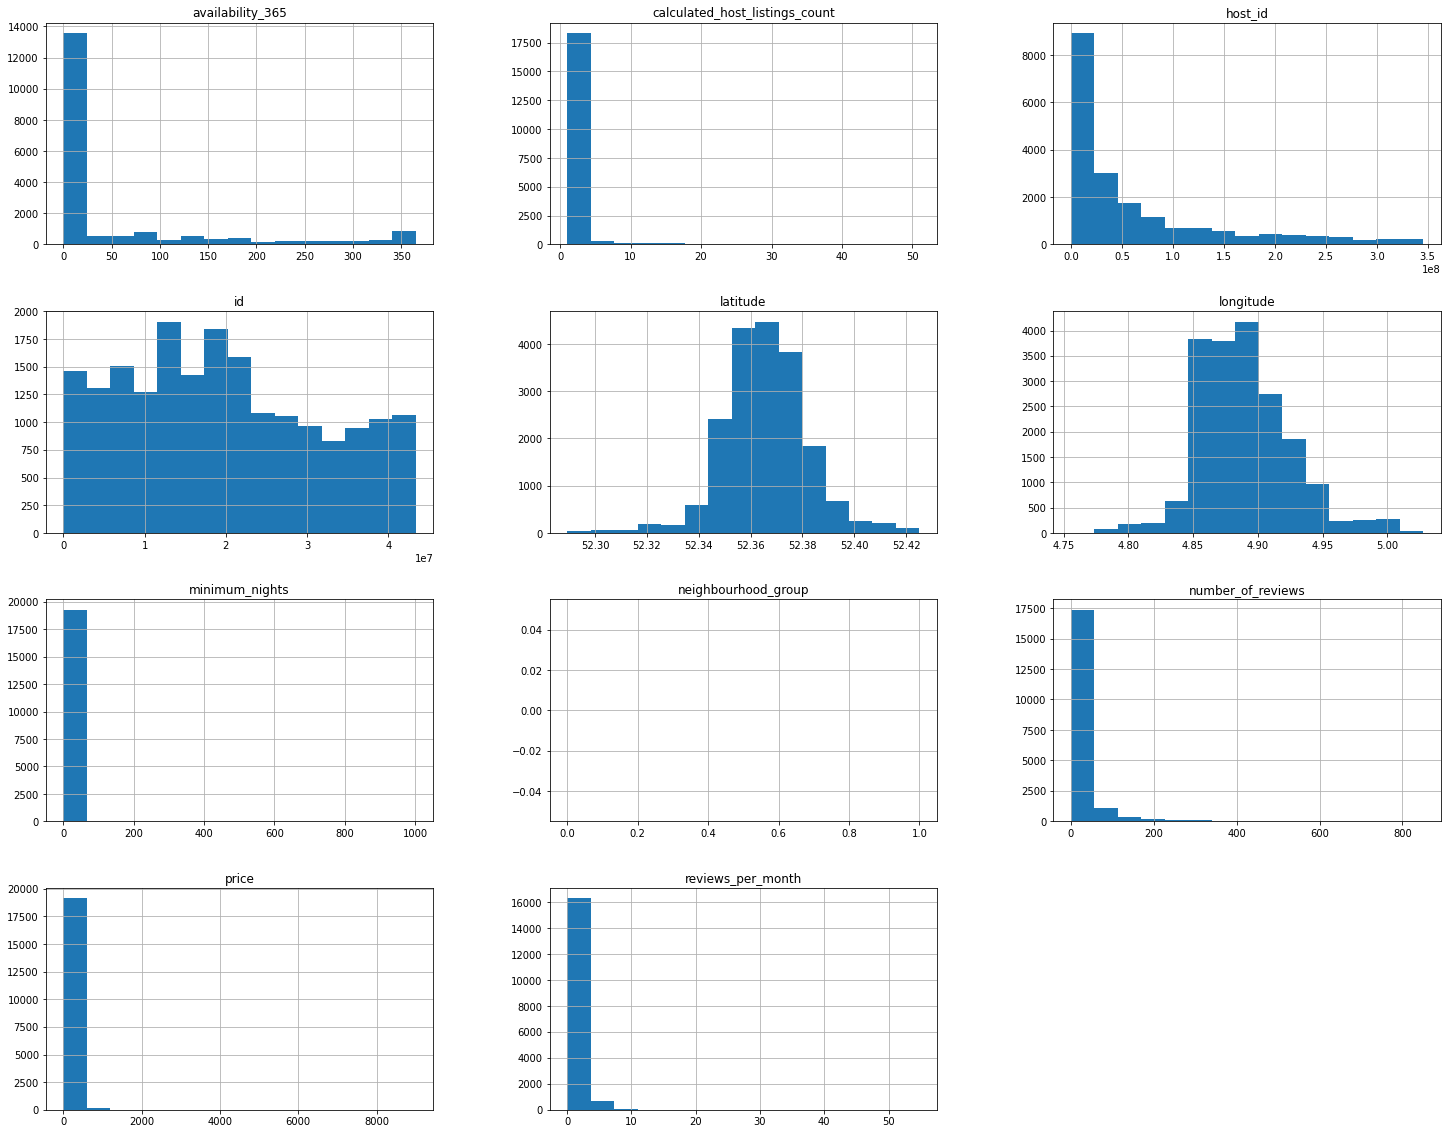

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(25,20));


#### **Q3.1 Há Outliers presentes?** 

In [0]:
# ver o resumo estatítisco das variáveis numéricas
df[['price', 'reviews_per_month','number_of_reviews','minimum_nights','calculated_host_listings_count','availability_365']].describe()

,price,reviews_per_month,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365
count,19278.000000,16980.000000,19278.000000,19278.000000,19278.000000,19278.000000
mean,165.722430,0.790479,25.283017,3.517533,1.975101,54.549798
std,233.884293,1.284863,54.496400,13.570089,4.482957,102.544437
min,5.000000,0.010000,0.000000,1.000000,1.000000,0.000000
25%,99.000000,0.180000,2.000000,2.000000,1.000000,0.000000
50%,131.000000,0.410000,9.000000,2.000000,1.000000,0.000000
75%,189.000000,0.810000,24.000000,3.000000,1.000000,65.000000
max,9000.000000,54.800000,850.000000,1001.000000,51.000000,365.000000


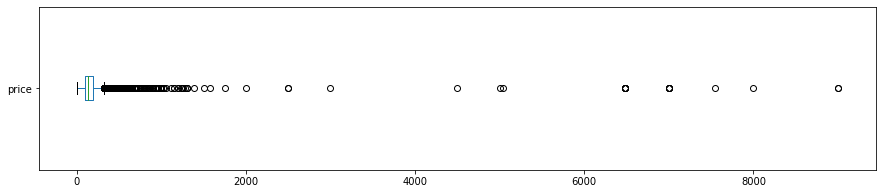


price: valores acima de 1500
24 entradas
0.1245%


In [0]:
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price >1500])))
print("{:.4f}%".format((len(df[df.price >1500]) / df.shape[0])*100))

### **Q4. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price``
df.price.mean()




165.7224297126258

### **Q5. Qual a correlação existente entre as variáveis**

In [0]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.022625,-0.031412,-0.017266,0.049409,0.151654
minimum_nights,0.022625,1.000000,-0.022449,-0.032418,-0.006002,0.068968
number_of_reviews,-0.031412,-0.022449,1.000000,0.759372,-0.019915,0.280618
reviews_per_month,-0.017266,-0.032418,0.759372,1.000000,0.037681,0.317301
calculated_host_listings_count,0.049409,-0.006002,-0.019915,0.037681,1.000000,0.156956
availability_365,0.151654,0.068968,0.280618,0.317301,0.156956,1.000000


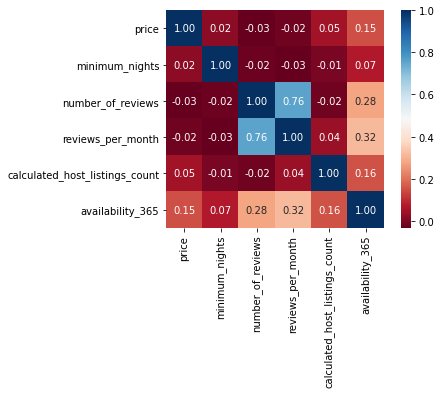

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    15034
Private room        3926
Hotel room           275
Shared room           43
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.779853
Private room       0.203652
Hotel room         0.014265
Shared room        0.002231
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média
df.groupby (['neighbourhood']).price.mean(). sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                225.110484
Centrum-Oost                224.294048
Zuid                        182.336489
IJburg - Zeeburgereiland    169.799127
Oud-Noord                   169.038529
De Pijp - Rivierenbuurt     168.580350
Westerpark                  152.874739
De Baarsjes - Oud-West      151.521779
Buitenveldert - Zuidas      150.682927
Oud-Oost                    147.332803
Name: price, dtype: float64

In [0]:
# ver quantidade de imóveis no Centrum-West
print(df[df.neighbourhood == 'Centrum-West'].shape)

#ver as 3 entradas do Centrum-West
df[df.neighbourhood == 'Centrum-West']

(2127, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.378020,4.89270,Entire home/apt,119,3,55,2018-06-29,0.45,1,36
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.372970,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.387610,4.89188,Private room,155,2,217,2020-03-02,2.14,1,287
5,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.367190,4.89092,Private room,75,2,332,2020-03-16,2.81,3,236
6,29051,Comfortable single room,124245,Edwin,NaN,Centrum-West,52.367730,4.89151,Private room,55,2,479,2020-03-14,4.30,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19247,43192884,Old city centre gorgeous White room apartment,330212087,Mieke,NaN,Centrum-West,52.372460,4.89900,Entire home/apt,148,2,0,NaN,NaN,1,365
19249,43203617,Grand experience in the city center!,233161020,Andrea,NaN,Centrum-West,52.369830,4.88680,Private room,120,2,0,NaN,NaN,1,23
19250,43211229,Uniquee 4BR Stay in center of Amsterdam,343067805,Stephen Lee,NaN,Centrum-West,52.379440,4.89104,Entire home/apt,795,4,0,NaN,NaN,1,352
19260,43254740,Cozy room Mercedesbnb Amsterdam center,143465074,Isabel,NaN,Centrum-West,52.382380,4.88821,Private room,98,1,0,NaN,NaN,2,0


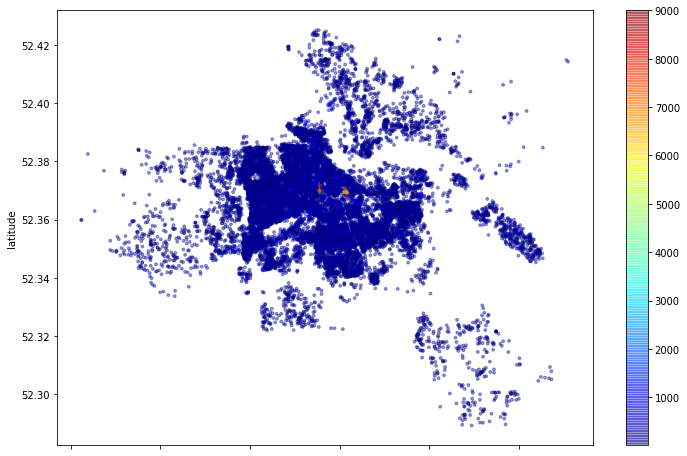

In [0]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.5175329391015664

## Conclusões


Foi feita apenas uma análise na base de dados resumida do Airbnb, porém percebeu-se que existem outliers em algumas das variáveis, como elas: *mínimo de noites* e *preço*.

É importante lembrar que este dataset é uma versão resumida, ideal apenas para uma abordagem básica. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com todos atributos disponíveis da base do Airbnb.